# Lab 5: Singular Value Decomposition

In this lab, you will learn gain more experience with ranks and Singular Value Decomposition (SVD) and learn how to use SVD in data science.

## Lab 5.A: SVD Tutorial with Questions

Let us start by importing two libraries, numpy and matplotlib. 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we will learn how to create matrices of any dimension that have a specified rank. To create a rank-1 matrix $A_{nxm}$, it is sufficient to define two vectors, $u_{[nx1]}$ and $v_{[mx1]}$ and find their *outer product*, $A = u \cdot v^T$.

In [39]:
# A simple rank-1 matrix of dimension 5x4
u = np.transpose([[1,1,1,1,1]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

# A more complicated rank-1 matrix of dimension 5x4
u = np.transpose([[1,2,3,4,5]])
print 'vector u:  '
print u
v = np.transpose([[1,2,3,4]])
print 'vector v:   '
print  v
A = np.dot(u,np.transpose(v))
print 'matrix A:   '
print A

print
print 'rank of matrix A:   '
print np.linalg.matrix_rank(A)
print 'size of A:'
print np.shape(A)
print 'type of objects u and A:'
print type(u), type(A)

vector u:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
rank of matrix A:   
1

vector u:  
[[1]
 [2]
 [3]
 [4]
 [5]]
vector v:   
[[1]
 [2]
 [3]
 [4]]
matrix A:   
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]
 [ 5 10 15 20]]

rank of matrix A:   
1
size of A:
(5, 4)
type of objects u and A:
<type 'numpy.ndarray'> <type 'numpy.ndarray'>


To generate a rank-2 matrix $A_{nxm}$, it is sufficient to define two pairs of vectors $(u_1,v_1)$ and $(u_2,v_2)$, where length of $u_1$ and $u_2$ is $n$ and length of $v_1$ and $v_2$ is $m$, calculate their *outer products* and add them up, $A = u_1 \cdot v_1^T + u_2 \cdot v_2^T$. 

In [17]:
# A simple rank-2 matrix of dimension 5x4
u1 = np.transpose([[1,1,1,1,1]])
u2 = np.transpose([[1,2,1,2,1]])
print 'vector u1:  '
print u1
print 'vector u2:  '
print u2
v1 = np.transpose([[1,0,2]])
v2 = np.transpose([[0,1,1]])
print 'vector v1:   '
print v1
print 'vector v2:   '
print v2
A = np.dot(u1,np.transpose(v1)) + np.dot(u2,np.transpose(v2))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

vector u1:  
[[1]
 [1]
 [1]
 [1]
 [1]]
vector u2:  
[[1]
 [2]
 [1]
 [2]
 [1]]
vector v1:   
[[1]
 [0]
 [2]]
vector v2:   
[[0]
 [1]
 [1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



A more compact way to do exactly the same is to create a matrix $U$ by concatenating vectors $u_1$ and $u_2$ and matrix $V$ by concatenating vectors $v_1$ and $v_2$, as $U = [u_1 u_2]$ and $V = [v_1 v_2]$   

In [25]:
# An alternative way of creating a rank-2 matrix
U = np.concatenate((u1,u2), axis = 1)
print U
V = np.concatenate((v1,v2), axis = 1)
print V
A = np.dot(U,np.transpose(V))
print 'matrix A:   '
print  A
print 'rank of matrix A:   '
print  np.linalg.matrix_rank(A)
print 

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]]
[[1 0]
 [0 1]
 [2 1]]
matrix A:   
[[1 1 3]
 [1 2 4]
 [1 1 3]
 [1 2 4]
 [1 1 3]]
rank of matrix A:   
2



**Question 1**. Explain why the previous 2 ways of creating the rank-2 matrix end up in exactly the same result. (*Note*: it is very important to understand why, so thake some time to think about it. It is acceptable to work out your explanation on a piece of paper and submit a photo of it as pdf file)

**Question 2**. Write a piece of code that generates a rank-3 matrix of dimension 6x5

Here is another way to quickly generate a large low-rank matrix. 

In [41]:
A = np.dot(np.transpose([[1,1,1,1,1],[1,2,1,2,1]]),np.random.rand(2,100))

**Question 3**. 
- What is the size of matrix A?
- What does the command `np.random.rand(2,100)` do?
- What is the rank of A? Why?

The rank of a zero matrix is always zero.

In [43]:
A = np.zeros((20,4))
print A
print np.linalg.matrix_rank(A)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
2


Let us now load Temple T data set and draw a scatter plot. 

[[-0.49806202  0.40064976]
 [-0.49806202  0.39731642]
 [-0.49806202  0.39398309]
 ..., 
 [ 0.49806202  0.05398309]
 [ 0.49806202  0.05064976]
 [ 0.49806202  0.04731642]]
The dimensions of A are:  (28226, 2)


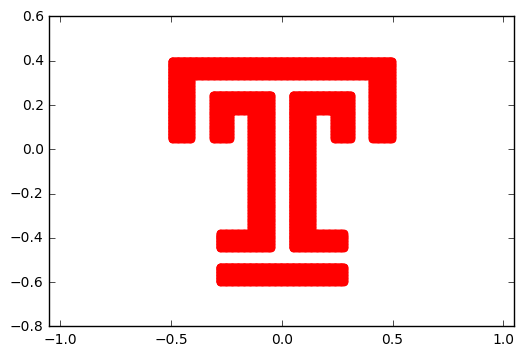

In [68]:
A = np.loadtxt('d_temple.csv', delimiter=",",dtype='float')
print A
print 'The dimensions of A are: ' , np.shape(A)
plt.scatter(A[:,0],A[:,1],color='red');
plt.axis('equal');

Let us see the effect of some transformations of A.

[[ 0.73252883  0.08342499]
 [ 0.59146938  0.51559872]]


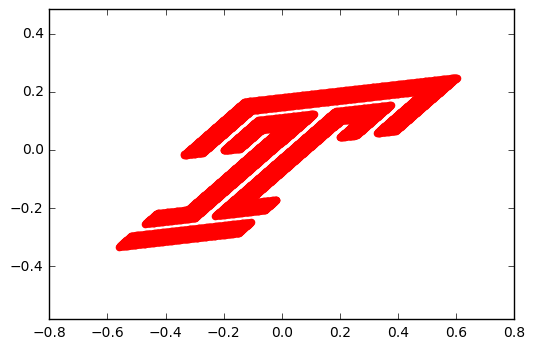

In [63]:
# Generate a random "projection" matrix
T = np.random.rand(2,2)
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[1, 0], [0, 3]]


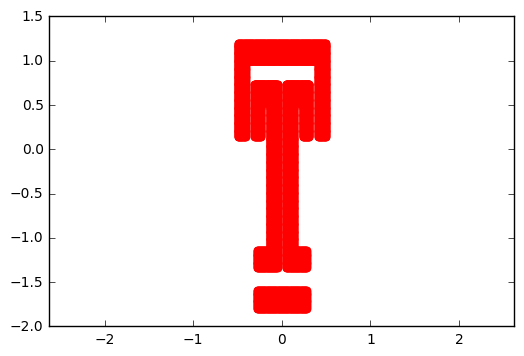

In [62]:
# Generate a "scaling" matrix
T = [[1,0],[0,3]]
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

[[0.45359612142557731, 0.89120736006143542], [-0.89120736006143542, 0.45359612142557731]]


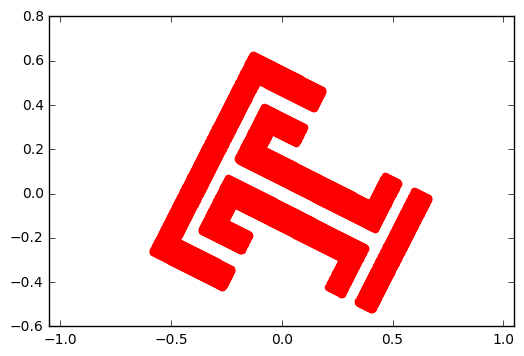

In [65]:
# Generate a "rotation" matrix
angle = 1.1
T = [[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]]
print T
# Multiply A with R
A2 = np.dot(A,T)
plt.scatter(A2[:,0],A2[:,1],color='red');
plt.axis('equal');

**Question 4**. Create a letter T that is 2 times wider than its original version and then rotated by 145 degrees counterclock-wise.

Let us now create a rank-2 large matrix out of Temple data, which has 100 attributes (columns).

(28226, 100)


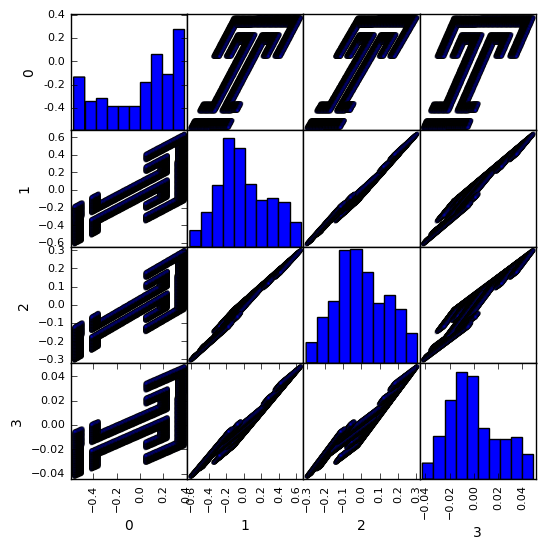

In [81]:
T = np.random.rand(2,100)
Abig = np.dot(A, T)
print np.shape(Abig)
# to plot a scatterplot of the first 4 columns... it will take a minute...
import pandas as pd 
pd.scatter_matrix(pd.DataFrame(Abig[:,1:5]), alpha=0.2, figsize=(6, 6));

**Question 5**. What is the rank of `Abig` and why?

Let us perform SVD on matrix `Abig`.

In [93]:
# SVD
U,s,V = np.linalg.svd(Abig,full_matrices=0)
print U.shape, s.shape, V.shape
print 'the first 10 singular values:', s[0:10]

(28226, 100) (100,) (100, 100)
the first 10 singular values: [  3.84577088e+02   1.29450898e+02   1.11644915e-13   6.43621642e-14
   5.07961441e-14   3.60159184e-14   3.60159184e-14   3.60159184e-14
   3.60159184e-14   3.60159184e-14]


Let us find a rank-2 approximation of `Abig`

In [115]:
# Find rank-2 aproximation
k = 2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print 'Norm of Abig:  ', np.linalg.norm(Abig, ord=2)
print 'First 10 singular values: ',  s[0:10]
print 'Norm of difference Abig-Ak = ', np.linalg.norm(Abig - Ak, ord=2)


Norm of Abig:   384.577087835
First 10 singular values:  [  3.84577088e+02   1.29450898e+02   1.11644915e-13   6.43621642e-14
   5.07961441e-14   3.60159184e-14   3.60159184e-14   3.60159184e-14
   3.60159184e-14   3.60159184e-14]
Norm of difference Abig-Ak =  4.29613341532e-13


**Question 6**.
- Find the Frobenius norm of the difference `Abig - Ak`
- Find rank-1 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.
- Find rank-3 approximation of `Abig`. What is the 2 norm and Frobenius norm of the difference? Discuss.

Let us visualize the scatter-plot of the first two columns of `U` (the first two left singular vectors)

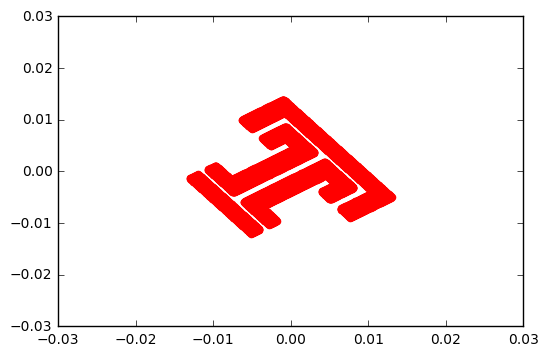

In [116]:
plt.scatter(U[:,0],U[:,1],color='red');

Perfect:  the first two columns of `U` are sufficient to reconstruct letter T!

Let us generate a noisy version of `Abig`

In [120]:
Abig_noise = Abig + np.random.randn(28226,100)*0.5 

**Question 7**. 
- Plot the scatterplot of the first 5 columns of `Abig_noise`. Discuss what you see.
- Perform SVD on `Abig_noise`. What are the first 10 singular values?
- Find the rank-2 approximation of this `Abig_noise`. What is the norm of the difference?
- Plot the scatterplot of the first two columns of `U`. Discuss what you see and why.

## Lab 5.B: Apply SVD on real data

- comming soon...